# **ANN Model**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.reset_defaults()

### **Import Data**

In [2]:
train = np.load("data/train_matrix.npy")
train_label = np.load("data/train_labels.npy")

In [3]:
test = np.load("data/test_matrix.npy")
test_labels = np.load("data/test_labels.npy")

### **Split training data into training and validtion set**

In [4]:
from sklearn.model_selection import train_test_split
xtrain, xvalid, ytrain, yvalid = train_test_split(train, train_label, test_size=0.10, random_state=123) 
del train, train_label

### **Build sequential model**

In [6]:
from tensorflow import keras

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = xtrain[0].shape))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(1))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 53)                0         
                                                                 
 dense_4 (Dense)             (None, 100)               5400      
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 25,701
Trainable params: 25,701
Non-trainable params: 0
_________________________________________________________________


In [10]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="mean_squared_error", optimizer=opt, metrics=[keras.metrics.RootMeanSquaredError()])

### **Train model**

In [11]:
history = model.fit(xtrain, ytrain, 
          batch_size=10000, 
          epochs=75, 
          validation_data=(xvalid, yvalid))

2022-08-21 17:45:26.396552: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 513062260 exceeds 10% of free system memory.


Epoch 1/75
243/243 [==============================] - 6s 18ms/step - loss: 35.4691 - root_mean_squared_error: 5.9556 - val_loss: 11.4239 - val_root_mean_squared_error: 3.3799
Epoch 2/75
243/243 [==============================] - 4s 17ms/step - loss: 10.0076 - root_mean_squared_error: 3.1635 - val_loss: 11.0860 - val_root_mean_squared_error: 3.3296
Epoch 3/75
243/243 [==============================] - 5s 19ms/step - loss: 8.9184 - root_mean_squared_error: 2.9864 - val_loss: 8.8706 - val_root_mean_squared_error: 2.9784
Epoch 4/75
243/243 [==============================] - 4s 17ms/step - loss: 8.4936 - root_mean_squared_error: 2.9144 - val_loss: 13.3436 - val_root_mean_squared_error: 3.6529
Epoch 5/75
243/243 [==============================] - 4s 17ms/step - loss: 8.3994 - root_mean_squared_error: 2.8982 - val_loss: 8.2089 - val_root_mean_squared_error: 2.8651
Epoch 6/75
243/243 [==============================] - 4s 17ms/step - loss: 8.1467 - root_mean_squared_error: 2.8542 - val_loss: 11

### **Loss**

In [12]:
loss = pd.DataFrame(history.history)
loss.tail()

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
70,6.148306,2.479578,8.174443,2.859098
71,6.218507,2.493693,8.375956,2.894124
72,5.925297,2.434193,6.473879,2.544382
73,5.813494,2.411119,6.768629,2.601659
74,5.961595,2.441638,6.639330,2.576690


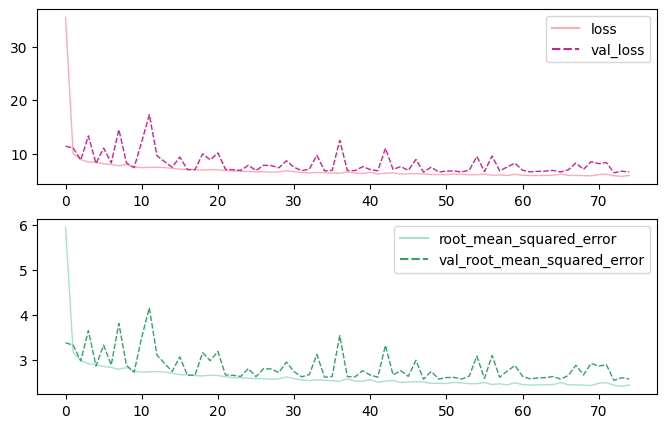

In [17]:
fig, axes = plt.subplots(nrows=2,figsize=(8,5), dpi=100)
sns.lineplot(data=loss.loc[:,["loss","val_loss"]], palette="RdPu",linewidth=1.0, ax=axes[0]);
sns.lineplot(data=loss.loc[:,["root_mean_squared_error","val_root_mean_squared_error"]], palette="BuGn",linewidth=1.0, ax=axes[1]);

### **Prediction**

In [18]:
model.evaluate(test, test_labels)

  168/28100 [..............................] - ETA: 25s - loss: 36.3013 - root_mean_squared_error: 6.0251  

2022-08-21 17:52:43.007907: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 190627008 exceeds 10% of free system memory.


28100/28100 [==============================] - 23s 830us/step - loss: 33.0765 - root_mean_squared_error: 5.7512


[33.076515197753906, 5.751218795776367]